In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv('earthquake_data.csv')
import json
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,eq_mag_ms,eq_mag_mb,intensity,country,state,location_name,latitude,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338,No,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UK,NaN,UNITED KINGDOM: BRITIAN,52.000,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771,Tsu,1580,4.0,6.0,NaN,NaN,NaN,33.0,6.2,NaN,NaN,NaN,NaN,UK,NaN,UNITED KINGDOM: DOVER STRAITS,51.019,1.309,120,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,7889,Tsu,1757,7.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UK,NaN,"UNITED KINGDOM: ENGLAND: ST. MARY, SCILLY ISL...",49.920,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697,Tsu,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,HI,HAWAII,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013,Tsu,1668,4.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,USA,MA,"BOSTON AND SALEM, MASSACHUSETTS",42.350,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,5360,Tsu,1993,8.0,8.0,8.0,34.0,24.9,59.0,7.8,7.8,8.0,7.1,9.0,USA TERRITORY,GU,"GUAM: TUMAN BAY, APRA HARBOR",12.982,144.801,170,48.0,1.0,250.0,4.0,48.0,1.0,250.0,4.0
6068,5009,No,1983,12.0,22.0,1.0,2.0,2.4,26.0,6.4,NaN,6.4,5.7,5.0,PAPUA NEW GUINEA,NaN,"PAPUA NEW GUINEA: ULAWUN, RABAUL",-5.392,151.868,170,NaN,NaN,25.0,4.0,NaN,NaN,25.0,4.0
6069,10307,No,2018,2.0,25.0,17.0,44.0,43.0,23.0,7.5,7.5,NaN,NaN,8.0,PAPUA NEW GUINEA,NaN,"PAPUA NEW GUINEA: S HIGHLANDS, HELA; INDONESIA",-6.068,142.768,170,300.0,3.0,61.0,4.0,300.0,3.0,61.0,4.0
6070,5498,No,1998,7.0,9.0,5.0,19.0,7.3,10.0,6.2,6.2,6.0,5.7,NaN,AZORES (PORTUGAL),NaN,"AZORES: FAIAL, PICO, TERCEIRA",38.650,-28.626,130,100.0,2.0,72.0,4.0,100.0,2.0,72.0,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   int64  
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   int64  
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [ ]:
data.head()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,eq_mag_ms,eq_mag_mb,intensity,country,state,location_name,latitude,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338,No,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UK,NaN,UNITED KINGDOM: BRITIAN,52.000,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771,Tsu,1580,4.0,6.0,NaN,NaN,NaN,33.0,6.2,NaN,NaN,NaN,NaN,UK,NaN,UNITED KINGDOM: DOVER STRAITS,51.019,1.309,120,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,7889,Tsu,1757,7.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UK,NaN,"UNITED KINGDOM: ENGLAND: ST. MARY, SCILLY ISL...",49.920,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697,Tsu,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,HI,HAWAII,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013,Tsu,1668,4.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,USA,MA,"BOSTON AND SALEM, MASSACHUSETTS",42.350,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.tail()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,eq_mag_ms,eq_mag_mb,intensity,country,state,location_name,latitude,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
6067,5360,Tsu,1993,8.0,8.0,8.0,34.0,24.9,59.0,7.8,7.8,8.0,7.1,9.0,USA TERRITORY,GU,"GUAM: TUMAN BAY, APRA HARBOR",12.982,144.801,170,48.0,1.0,250.0,4.0,48.0,1.0,250.0,4.0
6068,5009,No,1983,12.0,22.0,1.0,2.0,2.4,26.0,6.4,NaN,6.4,5.7,5.0,PAPUA NEW GUINEA,NaN,"PAPUA NEW GUINEA: ULAWUN, RABAUL",-5.392,151.868,170,NaN,NaN,25.0,4.0,NaN,NaN,25.0,4.0
6069,10307,No,2018,2.0,25.0,17.0,44.0,43.0,23.0,7.5,7.5,NaN,NaN,8.0,PAPUA NEW GUINEA,NaN,"PAPUA NEW GUINEA: S HIGHLANDS, HELA; INDONESIA",-6.068,142.768,170,300.0,3.0,61.0,4.0,300.0,3.0,61.0,4.0
6070,5498,No,1998,7.0,9.0,5.0,19.0,7.3,10.0,6.2,6.2,6.0,5.7,NaN,AZORES (PORTUGAL),NaN,"AZORES: FAIAL, PICO, TERCEIRA",38.650,-28.626,130,100.0,2.0,72.0,4.0,100.0,2.0,72.0,4.0
6071,5459,No,1997,4.0,22.0,9.0,31.0,23.2,5.0,6.7,6.7,6.5,6.0,NaN,TRINIDAD AND TOBAGO,NaN,TOBAGO,11.112,-60.892,90,2.0,1.0,25.0,4.0,2.0,1.0,25.0,4.0


In [ ]:
data.describe()

,id,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,eq_mag_ms,eq_mag_mb,intensity,latitude,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
count,6072.000000,6072.000000,5667.000000,5515.000000,4044.000000,3838.000000,2721.000000,3120.000000,4286.000000,1216.000000,2916.000000,1786.000000,2748.000000,6018.000000,6022.000000,6072.000000,1169.000000,1349.000000,478.000000,4327.000000,1184.000000,1357.000000,418.000000,3148.000000
mean,4658.426219,1802.307477,6.510852,15.734361,11.308605,28.855915,29.740243,41.680769,6.471419,6.526563,6.574451,5.797592,8.325328,22.537909,37.985633,109.844368,2293.579127,1.975537,1715.606259,2.263693,2510.967061,1.973471,1978.743206,2.193139
std,2924.650010,377.924931,3.450167,8.752862,7.033485,17.151545,17.132196,71.258782,1.043968,0.937869,0.989850,0.716809,1.800089,22.787934,86.726852,53.963219,27095.202227,1.084074,12157.409978,0.956053,28273.298405,1.082526,12988.187606,1.041035
min,1.000000,-2150.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,1.600000,3.600000,2.100000,2.100000,2.000000,-62.877000,-179.984000,10.000000,1.000000,1.000000,0.013000,1.000000,1.000000,1.000000,0.010000,1.000000
25%,2142.750000,1818.000000,4.000000,8.000000,5.000000,14.000000,14.800000,11.000000,5.700000,5.800000,5.800000,5.300000,7.000000,9.871750,-8.000000,50.000000,10.000000,1.000000,3.625000,1.000000,10.000000,1.000000,4.310000,1.000000
50%,4608.500000,1927.000000,7.000000,16.000000,11.000000,30.000000,29.700000,26.000000,6.500000,6.500000,6.600000,5.800000,8.000000,32.200000,43.300000,130.000000,42.000000,2.000000,20.900000,2.000000,42.500000,2.000000,28.000000,2.000000
75%,6475.250000,1986.000000,9.000000,23.000000,17.000000,44.000000,44.500000,40.000000,7.300000,7.200000,7.300000,6.300000,10.000000,38.778250,115.500000,160.000000,200.000000,3.000000,204.350000,3.000000,200.000000,3.000000,300.000000,3.000000
max,10378.000000,2018.000000,12.000000,31.000000,23.000000,59.000000,59.900000,675.000000,9.500000,9.500000,9.100000,8.200000,12.000000,73.122000,180.000000,170.000000,799000.000000,4.000000,220000.000000,4.000000,799000.000000,4.000000,220085.456000,4.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6072.0,4658.426219,2924.650010,1.000,2142.75000,4608.5,6475.25000,10378.000
year,6072.0,1802.307477,377.924931,-2150.000,1818.00000,1927.0,1986.00000,2018.000
month,5667.0,6.510852,3.450167,1.000,4.00000,7.0,9.00000,12.000
day,5515.0,15.734361,8.752862,1.000,8.00000,16.0,23.00000,31.000
hour,4044.0,11.308605,7.033485,0.000,5.00000,11.0,17.00000,23.000
minute,3838.0,28.855915,17.151545,0.000,14.00000,30.0,44.00000,59.000
second,2721.0,29.740243,17.132196,0.100,14.80000,29.7,44.50000,59.900
focal_depth,3120.0,41.680769,71.258782,0.000,11.00000,26.0,40.00000,675.000
eq_primary,4286.0,6.471419,1.043968,1.600,5.70000,6.5,7.30000,9.500
eq_mag_mw,1216.0,6.526563,0.937869,3.600,5.80000,6.5,7.20000,9.500


In [ ]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()
mask
total
percent

id                                0.000000
flag_tsunami                      0.000000
year                              0.000000
month                             6.669960
day                               9.173254
hour                             33.399209
minute                           36.791831
second                           55.187747
focal_depth                      48.616601
eq_primary                       29.413702
eq_mag_mw                        79.973650
eq_mag_ms                        51.976285
eq_mag_mb                        70.586298
intensity                        54.743083
country                           0.000000
state                            94.927536
location_name                     0.016469
latitude                          0.889328
longitude                         0.823452
region_code                       0.000000
injuries                         80.747694
injuries_description             77.783267
damage_millions_dollars          92.127800
damage_desc

In [ ]:
missing_data = pd.concat([total, percent], axis=1,join='outer',
 keys=['count_missing', 'perc_missing'])
missing_data

,count_missing,perc_missing
id,0,0.000000
flag_tsunami,0,0.000000
year,0,0.000000
month,405,6.669960
day,557,9.173254
hour,2028,33.399209
minute,2234,36.791831
second,3351,55.187747
focal_depth,2952,48.616601
eq_primary,1786,29.413702


In [ ]:
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
state,5764,94.927536
total_damage_millions_dollars,5654,93.115942
damage_millions_dollars,5594,92.127800
injuries,4903,80.747694
total_injuries,4888,80.500659
eq_mag_mw,4856,79.973650
injuries_description,4723,77.783267
total_injuries_description,4715,77.651515
eq_mag_mb,4286,70.586298
second,3351,55.187747


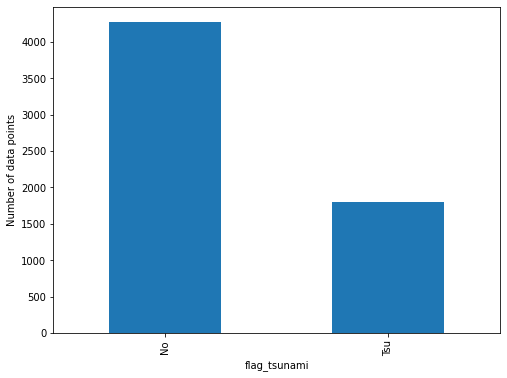

In [ ]:
plt.figure(figsize=(8,6))
data.flag_tsunami.value_counts().plot(kind='bar')
plt.ylabel('Number of data points')
plt.xlabel('flag_tsunami')
plt.show()

In [ ]:

import numpy as np
numeric_variables = data.select_dtypes(include=[np.number])
numeric_variables.columns

Index(['id', 'year', 'month', 'day', 'hour', 'minute', 'second', 'focal_depth',
       'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
       'latitude', 'longitude', 'region_code', 'injuries',
       'injuries_description', 'damage_millions_dollars', 'damage_description',
       'total_injuries', 'total_injuries_description',
       'total_damage_millions_dollars', 'total_damage_description'],
      dtype='object')

In [ ]:
#categorical variable 
object_variables = data.select_dtypes(include=[np.object])
object_variables.columns

Index(['flag_tsunami', 'country', 'state', 'location_name'], dtype='object')

In [ ]:
numeric_variables.nunique().sort_values()

total_damage_description            4
total_injuries_description          4
damage_description                  4
injuries_description                4
intensity                          11
month                              12
region_code                        18
hour                               24
day                                31
eq_mag_mb                          47
eq_mag_mw                          54
eq_mag_ms                          55
minute                             60
eq_primary                         64
focal_depth                       197
total_damage_millions_dollars     233
damage_millions_dollars           243
injuries                          338
total_injuries                    344
second                            575
year                              946
latitude                         2885
longitude                        3654
id                               6072
dtype: int64

In [ ]:
counts = data.injuries_description.value_counts(dropna=False)
counts

NaN    4723
1.0     666
3.0     347
2.0     193
4.0     143
Name: injuries_description, dtype: int64

In [ ]:
counts.reset_index().sort_values(by='index')

,index,injuries_description
1,1.0,666
3,2.0,193
2,3.0,347
4,4.0,143
0,NaN,4723


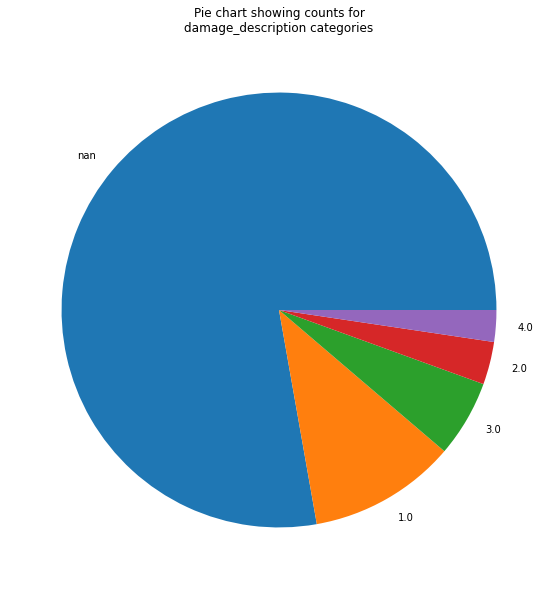

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(counts, labels=counts.index)
plt.title('Pie chart showing counts for\ndamage_description categories')
plt.show()

In [ ]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis=1,join='outer',
 keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
state,5764,94.927536
total_damage_millions_dollars,5654,93.115942
damage_millions_dollars,5594,92.127800
injuries,4903,80.747694
total_injuries,4888,80.500659
eq_mag_mw,4856,79.973650
injuries_description,4723,77.783267
total_injuries_description,4715,77.651515
eq_mag_mb,4286,70.586298
second,3351,55.187747


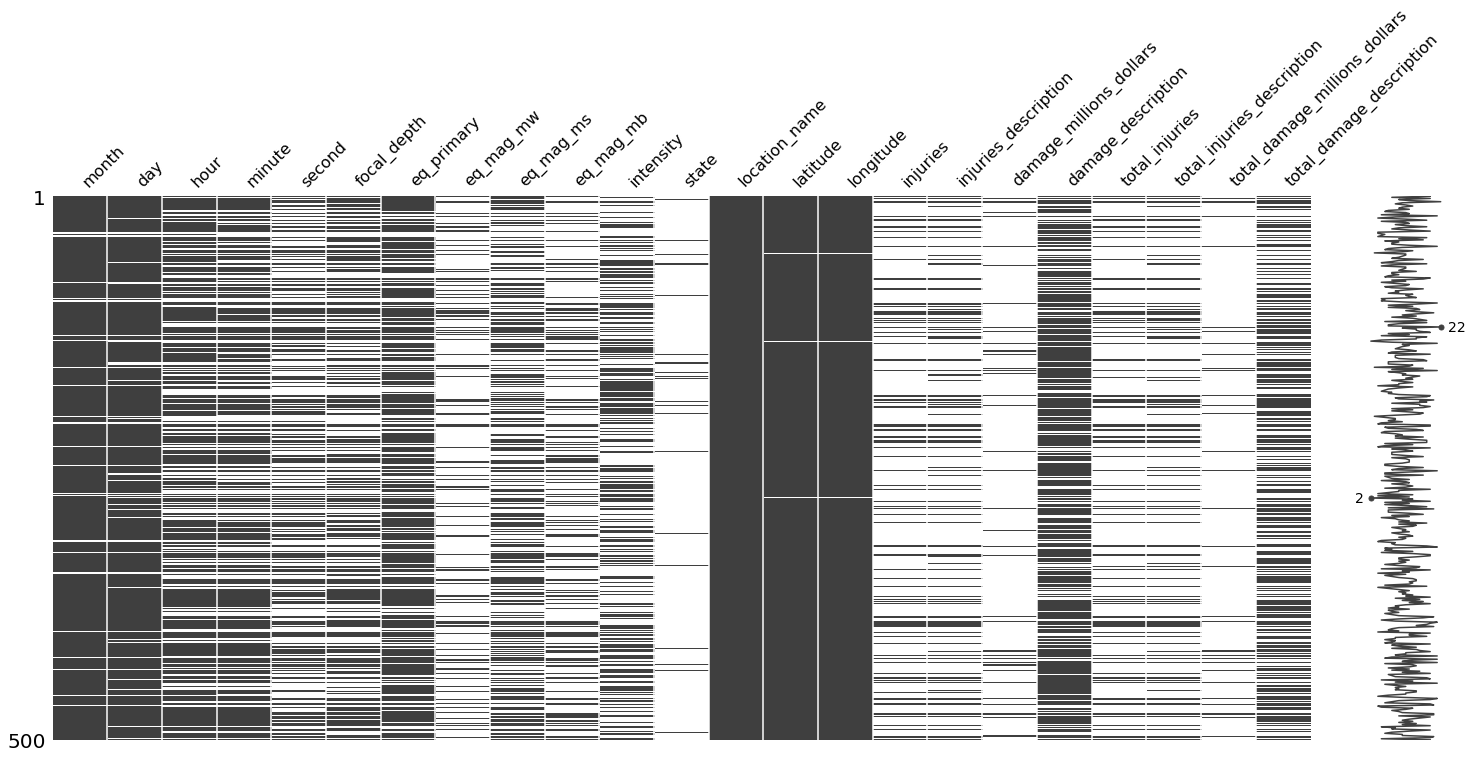

In [ ]:
# nullity matrix- black means for a non null value 
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns].sample(500))
plt.show()

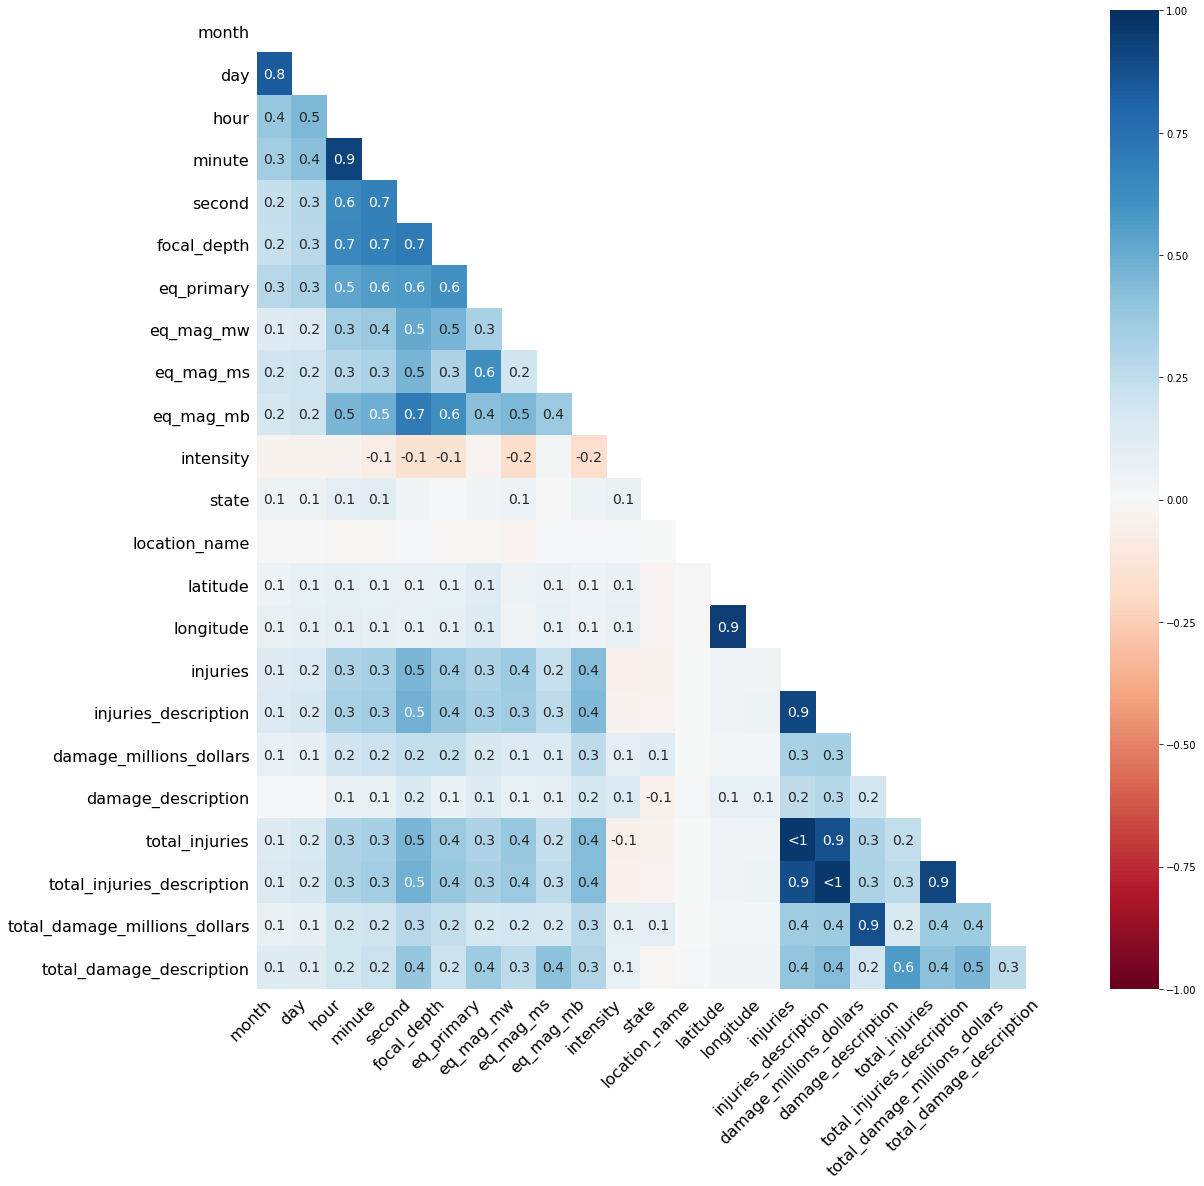

In [ ]:
#nullity correlation heatmap
msno.heatmap(data[nullable_columns], figsize=(18,18))
plt.show()
#if the correlation between the values of the variables themselves is high, it means that 
#having both is not a value and one of the two can be dropped

In [ ]:
#There are multiple ways of dealing with missing values in a column... What should be the most important decision in this kind of situation?

In [ ]:
time_features = ['month', 'day', 'hour', 'minute', 'second']
data[time_features] = data[time_features].fillna(0)

In [ ]:
data[time_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   6072 non-null   float64
 1   day     6072 non-null   float64
 2   hour    6072 non-null   float64
 3   minute  6072 non-null   float64
 4   second  6072 non-null   float64
dtypes: float64(5)
memory usage: 237.3 KB


In [ ]:
description_features = [
 'injuries_description', 'damage_description',
 'total_injuries_description', 'total_damage_description'
]